In [1]:
!conda list cudatoolkit

# packages in environment at C:\Users\LEE\anaconda3\envs\dh:
#
# Name                    Version                   Build  Channel
cudatoolkit               11.4.3              h208a305_13    conda-forge


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
gpu_devices = tf.config.list_physical_devices('GPU')
print("GPU devices:", gpu_devices)

TensorFlow version: 2.18.0-dev20240906
GPU devices: []


In [3]:
import tensorflow as tf
print("Is built with CUDA:", tf.test.is_built_with_cuda())   # CUDA 지원 여부 확인
print("Is GPU available:", tf.config.list_physical_devices('GPU'))  # GPU 지원 여부 확인

Is built with CUDA: False
Is GPU available: []


Epoch 1/50


C:\Users\LEE\anaconda3\envs\dh\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.3711 - loss: 1.4453 - val_accuracy: 0.5307 - val_loss: 1.0841
Epoch 2/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.5486 - loss: 1.0567 - val_accuracy: 0.6250 - val_loss: 0.9172
Epoch 3/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.6147 - loss: 0.9158 - val_accuracy: 0.6950 - val_loss: 0.7689
Epoch 4/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.6960 - loss: 0.7521 - val_accuracy: 0.7224 - val_loss: 0.7273
Epoch 5/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.7608 - loss: 0.6170 - val_accuracy: 0.7922 - val_loss: 0.5279
Epoch 6/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8226 - loss: 0.4598 - val_accuracy: 0.8476 - val_loss: 0.4108
Epoch 7/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.8557 - loss: 0.3776 - val_accuracy: 0.8287 - val_loss: 0.4588
Epoch 8/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.8740 - loss: 0.3217 - val_accurac

모델이 'lstm_model.h5'로 저장되었습니다.
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Confusion Matrix:
[[1082    0    0    0    0]
 [   2  798    0    0    0]
 [   0    3  670    0    0]
 [   0    0    0  664    3]
 [   2    3    0    0  685]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.99      1.00      1.00       800
           2       1.00      1.00      1.00       673
           3       1.00      1.00      1.00       667
           4       1.00      0.99      0.99       690

    accuracy                           1.00      3912
   macro avg       1.00      1.00      1.00      3912
weighted avg       1.00      1.00      1.00      3912



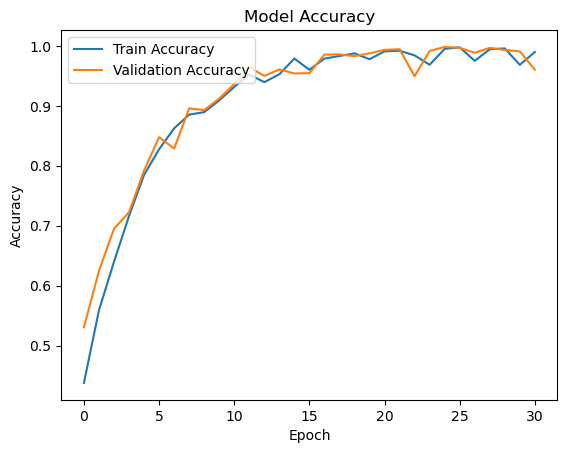

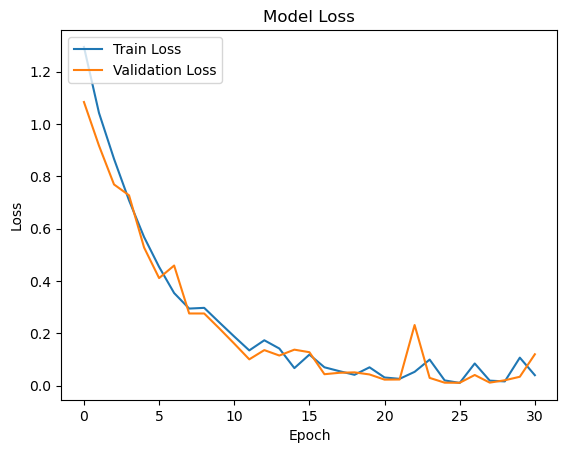

         user activity  x-accl  y-accl  z-accl               Label
15710  jeremy        D    -142     284    -125    Walking Upstairs
15711  jeremy        D    -171     279    -134  Walking Downstairs
15712  jeremy        D     -88     328    -138             Walking
15713  jeremy        D    -150     337    -159             Sitting
15714  jeremy        D    -113     247    -160             Walking


In [4]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. LSTM 모델 정의 (6개의 클래스로 분류)
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(6, activation='softmax'))  # 6개의 클래스로 분류
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 2. 자이로 데이터 불러오기
data = pd.read_csv('./원본 데이터/transformed_train.csv')

# 3. 문자열 열(예: 사용자 이름 등)을 제거하고 수치형 데이터만 선택
# 예시로 문자열 열이 'user' 열에 있다고 가정, 'activity'는 라벨로 따로 처리
data_numeric = data.select_dtypes(include=[np.number])  # 수치형 데이터만 선택

# 4. 데이터 전처리 (StandardScaler로 수치형 데이터 스케일링)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# 5. LSTM 모델에 맞는 입력 형태로 변환 (샘플 수, 타임스텝, 피처 수)
time_steps = 64  # 각 샘플이 64개의 타임스텝을 가짐
n_features = data_scaled.shape[1]
X = np.array([data_scaled[i:i + time_steps] for i in range(len(data_scaled) - time_steps)])

# 6. 라벨 처리 (activity 값을 실제 LABELS 리스트와 매핑)
# 'activity' 열에서 라벨을 추출하여 행동 패턴으로 변환
LABELS = ["Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Lying"]

# 예시: 'A', 'B', 'C', 'D', 'E'를 각각 실제 행동 패턴에 매핑
label_mapping = {
    'A': 'Walking',
    'B': 'Walking Upstairs',
    'C': 'Walking Downstairs',
    'D': 'Sitting',
    'E': 'Standing'
}

# 타임스텝에 맞춰 라벨도 자른 후 변환
label_column = data['activity'].iloc[time_steps:].reset_index(drop=True)

# 라벨을 실제 행동으로 변환한 후 매핑
y = label_column.map(label_mapping).map(lambda label: LABELS.index(label)).values

# 라벨의 크기를 입력 데이터 X에 맞게 조정
y = y[:len(X)]  # y와 X의 크기를 맞춤

# 7. 라벨을 One-hot 인코딩
y_categorical = to_categorical(y, num_classes=6)

# 8. 학습 및 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# 9. LSTM 모델 생성
input_shape = (time_steps, n_features)
model = build_lstm_model(input_shape)

# 10. EarlyStopping 콜백 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 11. 모델 훈련 (배치 크기: 64, 에포크: 50)
batch_size = 64
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 모델 훈련 후 학습된 모델을 저장합니다.
model.save('./lstm_model.h5')
print("모델이 'lstm_model.h5'로 저장되었습니다.")

# 12. 예측 및 성능 평가
predictions = model.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# 13. 혼동 행렬 및 분류 성능 보고서 출력
cm = confusion_matrix(y_val_true, predicted_labels)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_val_true, predicted_labels))

# 14. 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# 15. 자이로 데이터에 라벨 추가 (검증 데이터 크기에 맞춰 수정)
gyro_data_with_labels = data.iloc[len(data) - len(predictions):].copy()  # 타임스텝에 맞춰 데이터 크기 조정
gyro_data_with_labels['Label'] = [LABELS[np.argmax(p)] for p in predictions]  # 예측된 라벨 추가

# 라벨링이 완료된 데이터 확인
print(gyro_data_with_labels.head())

# 16. 결과를 CSV로 저장 (필요 시)
gyro_data_with_labels.to_csv('./원본 데이터/labeled_gyro_data_with_labels.csv', index=False)